In [ ]:
# Artificial and Computational Intelligence Assignment 6

#Problem solving using A* ( Informed ) Search Algorithm

A* is similar to Dijkstra’s Algorithm which is used to find the shortest path . A* is like Greedy Best-First-Search. It used heuristic values to guide itself.

The secret to its success is that it combines the pieces of information that Dijkstra’s Algorithm uses (favoring vertices that are close to the starting point) and information that Greedy Best-First-Search uses (favoring vertices that are close to the goal).

A* achieves optimality and completeness, two valuable property of search algorithms.

When a search algorithm has the property of optimality, it means it is guaranteed to find the best possible solution. When a search algorithm has the property of completeness, it means that if a solution to a given problem exists, the algorithm is guaranteed to find it.

In [ ]:
#Define the agent environment in the following block
#PEAS environment, Initial data structures to define the graph and variable declarations

Fully Observable- The agent has information on the path cost and time for each city well before head. Hence can be considered as fully observable.

Single Agent- There is only a single agent which determines the path and the cost for the city.

Deterministic- The agents current state and action determines the next state of the environment (city to be visited). Sequential- In sequential , an agent requires memory of past action to determine next best action. In this case, the cost value found for a city would be needed to determine the path to the next city.

Static- Here the environment doesn’t change.

Continuous- There cannot be finite number of possibilities to be performed in this case scenario. Whenever there is an addition of a new city, the calculations and estimation would change. Hence resulting in a rapidly changing environment which would be determined as “Continuous”.

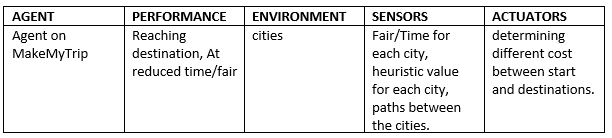

In [ ]:
#Task Environment

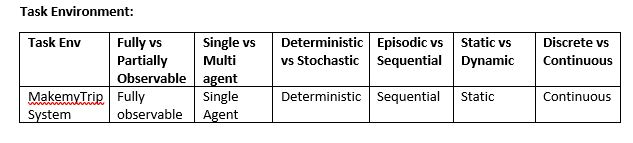

In [ ]:
import pandas as pd
import json
import sys

# Reading Graph input file
graph_data = pd.read_csv('graph_input.csv')

In [ ]:
## Class definition for Edge and Graph
class Edge:

    def __init__(self, vertex1, vertex2, w_fare, w_time):
        self.vertex1 = vertex1
        self.vertex2 = vertex2
        self.w_fare = w_fare
        self.w_time = w_time
        
    def get_edge_info(self):
        return "Edge : {} <----{} / {}----> {}".format(self.vertex1, self.w_fare, self.w_time, self.vertex2)

class Graph:
    
    def __init__(self):
        self.vertices = dict()

    ## Function - Adding edges for the vertices
    def add_edge(self, edge):
        if edge.vertex1 not in self.vertices:
            self.vertices[edge.vertex1] = []
            
        if edge.vertex2 not in self.vertices:
            self.vertices[edge.vertex2] = []
            
        # Maintaining Adjacency List for the vertices
        self.vertices[edge.vertex1].append((edge.vertex2, edge.w_fare, edge.w_time))
        self.vertices[edge.vertex2].append((edge.vertex1, edge.w_fare, edge.w_time))
    
    ## Function - to print the graph and vertices details
    def print_graph(self):
        print("Number of Vertices in the Graph : ", len(self.vertices))
        keys = self.vertices.keys()
        for key in keys:
            print(key, ":", end=" ")
            print(self.vertices[key], end=" ")
    
    ## Function - to render the graph
    def render_graph(self):
        graph_data = {}
        keys = self.vertices.keys()
        for key in keys:
            graph_data[key] = self.vertices[key]
        return graph_data


#Coding begins here

In [ ]:
def implement_graph():
    
    # Empty Edge List
    edges =[]
    
    # Creating the list of Edges as per the input file
    for i in range(len(graph_data)):
        g_input = graph_data.loc[i].values.tolist()
        v1,v2,wf,wt = tuple(g_input)
        edge = Edge(v1,v2,wf,wt)
        edges.append(edge)
    
    for edge in edges:
        pass
    
    # Initialise Graph() object
    graph = Graph()
    
    # Adding the edges
    for edge in edges:
        graph.add_edge(edge)
    
    graph_input = graph.render_graph()
    return graph_input

In [ ]:
# Function returns details on a vertex's neighbors
def neighbor_info(Graph_nodes, v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None

# Function to fetch heuristic value of individual vertex
def heuristic(n):
        with open('heuristics.json') as json_data:
            H_dist = json.load(json_data)
        return H_dist[n]

### Implementation of A* ( A Star ) Search Algorithm

In [ ]:
def aStar_Search(start_node, goal_node):
        
        # Function call to fetch the Graph
        Graph_nodes = implement_graph()
        
        start_res = 'True' if Graph_nodes.get(start_node) else 'False'
        goal_res = 'True' if Graph_nodes.get(goal_node) else 'False'
        
        if ( start_res == 'True' and goal_res == 'True'):    
            open_set_coll = set(start_node) 
            closed_set_coll = set()
            #To store the distance of goal node from start node
            dists_g = {}
            # To store details of parent nodes with adjancency map details
            parent_nodes = {}

            #distance of self node is always zero
            dists_g[start_node] = 0
            #Assigning the start node as the Root node, Initially
            parent_nodes[start_node] = start_node

            while len(open_set_coll) > 0:
                n = None

                #Finding the lowest cost funtion f(x)
                for v in open_set_coll:
                    if n == None or dists_g[v] + heuristic(v) < dists_g[n] + heuristic(n):
                        n = v
                
                # Using the vertex's neighbor details , checking for each vertex weight and time to 
                # Calculate the time taken
                if n == goal_node or Graph_nodes[n] == None:
                    pass
                else:
                    for (m, weight_fare, cost_time) in neighbor_info(Graph_nodes, n):
                        if m not in open_set_coll and m not in closed_set_coll:
                            open_set_coll.add(m)
                            parent_nodes[m] = n
                            dists_g[m] = dists_g[n] + cost_time

                        #for each node 'm',compare its distance from start ( from dists_g(m) ) via all nodes
                        else:
                            if dists_g[m] > dists_g[n] + cost_time:
                                dists_g[m] = dists_g[n] + cost_time
                                
                                parent_nodes[m] = n

                                #Removing the node if it is already part of closed set and adding it to open set
                                if m in closed_set_coll:
                                    closed_set_coll.remove(m)
                                    open_set_coll.add(m)

                if n == None:
                    print('Path does not exist!')
                    return None

                # Once we reached the goal node, we are getting the path from start node to goal node
                if n == goal_node:
                    path = []

                    while parent_nodes[n] != n:
                        path.append(n)
                        n = parent_nodes[n]

                    path.append(start_node)
                    path.reverse()
                    
                    return path, dists_g[m]

                # remove n from the open_list, and add it to closed_list, as all the neighbors are inspected
                open_set_coll.remove(n)
                closed_set_coll.add(n)
        else:
            print("Invalid Start Node : {} or Goal Node : {} ".format(start_node, goal_node))
            return None,None

def main():
    snode = input('Enter Start node : ')
    gnode = input('Enter Goal node : ')
    print()
    (route_path, cost_of_path) = aStar_Search(snode, gnode)
    if route_path == None or cost_of_path == None:
        pass
    else:
        print('The path taken by agent : {}'.format(" --> ".join(route_path)))
        print()
        print('The cost of the path taken : {}'.format(int(cost_of_path)) , 'hrs')    

### Calling main function

In [ ]:
if __name__ == '__main__':
    main()